<a href="https://colab.research.google.com/github/yeyevtushenko/AI/blob/Lesson29.04.2024/Lesson29_04_2024_AI_P_20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Завдання

* Завантажте усі датафрейми
* Добавте до кожного стовпчик `labels` з відповідним йому класом(bussiness, sports, education, etc). назви класів беріть з назв файлів
* Об'єднайте всі датафрейми в один, див [pd.concat](https://pandas.pydata.org/docs/reference/api/pandas.concat.html)
* Створіть стовпчик `text` в якому зберігатиметься текст для подальшої роботи. Можети вибрати такі варіанти:
  * Взяти один зі стовпчиків `headline`, `description`, `content`
  * Об'єднати тексти зі стовпчиків `headline`, `description`, `content`
* Видаліть стовпчики `headline`, `description`, `content`, `url`
* Розділіть дані на тренувальні та тестові
* Застосуйте `TfidfVectorizer`
* Натренуйте модель
* Виведіть результати

**Додатково**
* У `MyTokenizer` добавте обробку тексту за допомогою `nltk`, застусуйте один з варіантів:
  * стематизація
  * лематизація(використайте `nltk.pos_tag` для визначення частини мови)
  * обидва варіанти
* Використайте `n-gram` для класифікації(можливо доведеться збільшити `max_features`)
* Натренуйте різні моделі:
  * [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier)
  * [GaussianNB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB)
  * [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC) з параметром `kernel="linear"`
  * [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC) з параметром `kernel="rbf"`
  * [MLPClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier)
* Використайте `optuna` для підбору гіперпараметрів


# Дані про статті

In [ ]:
import pandas as pd

business = pd.read_csv("https://raw.githubusercontent.com/HalyshAnton/IT-Step-Pyton-AI/main/module6/data/business_data.csv")
education = pd.read_csv("https://raw.githubusercontent.com/HalyshAnton/IT-Step-Pyton-AI/main/module6/data/education_data.csv")
entertainment = pd.read_csv("https://raw.githubusercontent.com/HalyshAnton/IT-Step-Pyton-AI/main/module6/data/entertainment_data.csv")
sports = pd.read_csv("https://raw.githubusercontent.com/HalyshAnton/IT-Step-Pyton-AI/main/module6/data/sports_data.csv")
technology = pd.read_csv("https://raw.githubusercontent.com/HalyshAnton/IT-Step-Pyton-AI/main/module6/data/technology_data.csv")

In [ ]:
business_new = business.drop(columns=['headlines', 'description', 'url']).rename(columns={'content': 'text'})
education_new = education.drop(columns=['headlines', 'description', 'url']).rename(columns={'content': 'text'})
entertainment_new = entertainment.drop(columns=['headlines', 'description', 'url']).rename(columns={'content': 'text'})
sports_new = sports.drop(columns=['headlines', 'description', 'url']).rename(columns={'content': 'text'})
technology_new = technology.drop(columns=['headlines', 'description', 'url']).rename(columns={'content': 'text'})

In [ ]:
articles = pd.concat([business_new, education_new, entertainment_new, sports_new, technology_new], ignore_index=True).sample(frac=1, random_state=42).reset_index(drop=True)
articles.head()

,text,category
0,Fast bowler Mohammed Shami is likely to miss t...,sports
1,Indian wicketkeeper-batsman KL Rahul credits h...,entertainment
2,Infosys on Thursday reported a lower-than-expe...,business
3,Tamil actor and politician Vijayakanth passed ...,entertainment
4,"Ira Khan, the daughter of Bollywood actor Aami...",entertainment


##Розділіть дані на тренувальні та тестові


In [ ]:
from sklearn.model_selection import train_test_split

X = articles['text']
y = articles['category']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, stratify=y)

In [ ]:
X.shape

(10000,)

##Обробка даних

In [ ]:
# class MyTokenizer:
#      def __init__(self):
#          self.some_args = None
#      def __call__(self, text):
#          return text.split()
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer


class MyTokenizer:
    def __init__(self):
        self.stemmer = PorterStemmer()

    def __call__(self, text):
        words = word_tokenize(text)

        stemmed_words = [self.stemmer.stem(word) for word in words]
        return stemmed_words

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


##Застосуйте TfidfVectorizer

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=25000, tokenizer=MyTokenizer(), stop_words='english')
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'formerli', 'forti', 'ha', 'henc', 'hereaft', 'herebi', 'hi', 'howev', 'hundr', 'inde', 'latterli', 'mani', 'meanwhil', 'moreov', 'mostli', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'seriou', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', '

In [ ]:
X_train

<8000x25000 sparse matrix of type '<class 'numpy.float64'>'
	with 769601 stored elements in Compressed Sparse Row format>

In [ ]:
from sklearn.decomposition import TruncatedSVD

pca = TruncatedSVD(1000)

X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [ ]:
pca.explained_variance_ratio_.sum()

0.5889638761914946

In [ ]:
X_train.shape

(8000, 1000)

## Модель

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(class_weight="balanced")

model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced')

In [ ]:
y_pred = model.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

               precision    recall  f1-score   support

     business       0.97      0.96      0.96       400
    education       0.99      0.98      0.98       400
entertainment       1.00      0.99      0.99       400
       sports       0.99      0.99      0.99       400
   technology       0.95      0.97      0.96       400

     accuracy                           0.98      2000
    macro avg       0.98      0.98      0.98      2000
 weighted avg       0.98      0.98      0.98      2000



## Матриця

[]

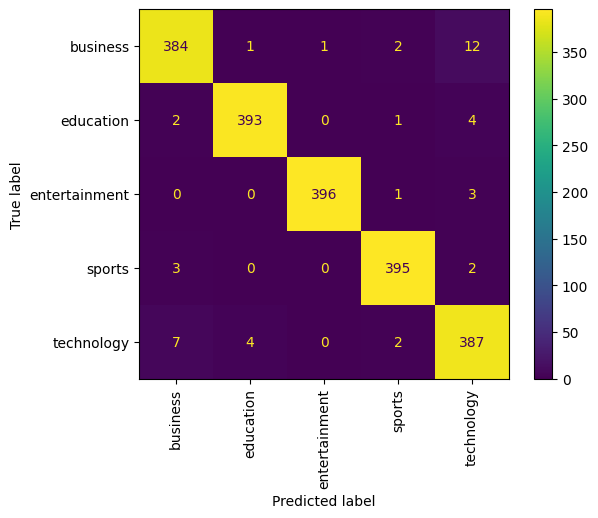

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt


ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.xticks(rotation=90)
plt.plot()

## Остаточна модель

In [ ]:
from sklearn.pipeline import Pipeline

final_model = Pipeline(steps=[
    ('vectorizer', vectorizer),
    ('pca', pca),
    ('model', model)
])

final_model

Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(max_features=25000, stop_words='english',
                                 tokenizer=<__main__.MyTokenizer object at 0x7b9f8a86edd0>)),
                ('pca', TruncatedSVD(n_components=1000)),
                ('model', LogisticRegression(class_weight='balanced'))])